In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
!head -n 10 click_revenue.csv

date,view_cus_count,view_count,total_cus_count,transaction_count,revenue,click_cus_count,click_count
2018-09-01,63034,306356,5062,5185,550354.7099999974,2348,3208
2018-09-02,62945,306175,5020,5136,547736.3399999974,2357,3346
2018-09-03,71317,351109,7108,7307,788901.2599999974,2655,3776
2018-09-04,59023,253155,5958,6104,647224.5399999954,1988,2722
2018-09-05,60926,242625,4328,4431,367840.9699999995,1891,2541
2018-09-06,73142,317311,6558,6753,609711.2499999993,2400,3229
2018-09-07,76742,333027,6805,7026,658813.5199999984,2571,3492
2018-09-08,83216,376240,6518,6683,631885.8299999995,3062,4142
2018-09-09,85479,403594,7802,7957,788516.4799999985,3221,4497


In [3]:
df = pd.read_csv('click_revenue.csv', parse_dates=['date'])
df.head()

,date,view_cus_count,view_count,total_cus_count,transaction_count,revenue,click_cus_count,click_count
0,2018-09-01,63034,306356,5062,5185,550354.71,2348,3208
1,2018-09-02,62945,306175,5020,5136,547736.34,2357,3346
2,2018-09-03,71317,351109,7108,7307,788901.26,2655,3776
3,2018-09-04,59023,253155,5958,6104,647224.54,1988,2722
4,2018-09-05,60926,242625,4328,4431,367840.97,1891,2541


In [4]:
import pymc3 as pm
from scipy import stats
import seaborn as sns
import statsmodels.formula.api as smf

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.style.use(['seaborn-colorblind', 'seaborn-darkgrid'])

/home/fm-rui/anaconda3/envs/fastai-cpu/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


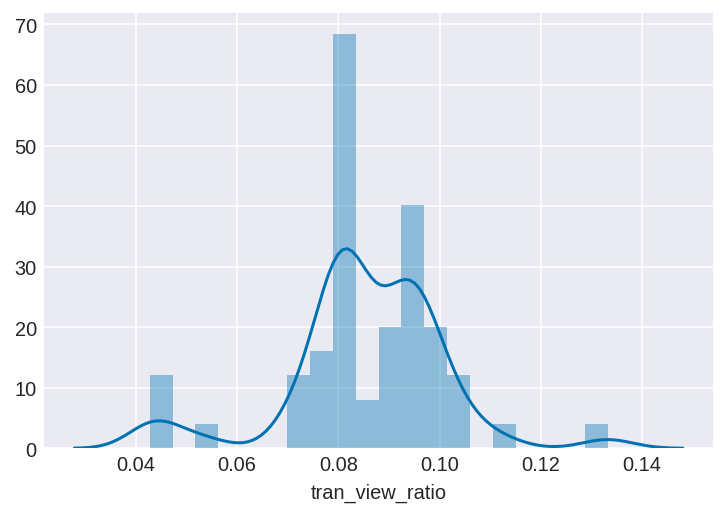

In [5]:
df['tran_view_ratio'] = df['transaction_count']/df['view_cus_count']
sns.distplot(df['tran_view_ratio'],bins=20)

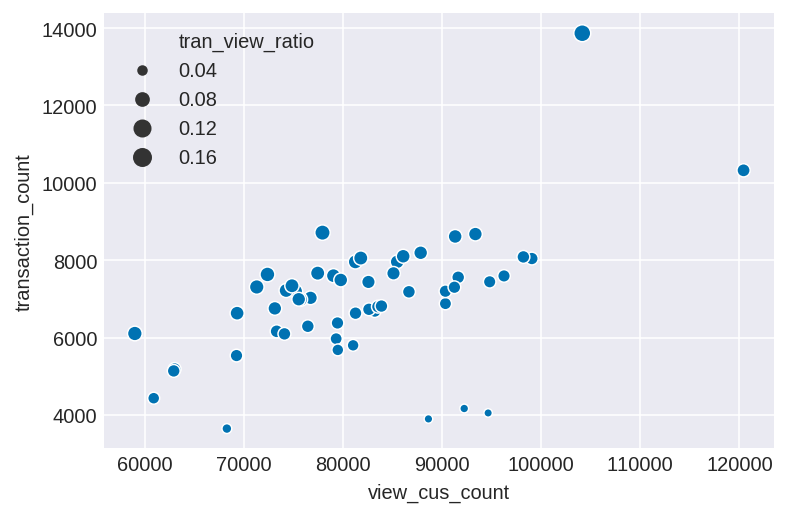

In [6]:
sns.scatterplot(x='view_cus_count',
                y='transaction_count',
                size='tran_view_ratio',
                data=df)

In [7]:
# filter by percentile
lower_end = np.percentile(df['tran_view_ratio'], 8)
high_end = np.percentile(df['tran_view_ratio'], 95)
print(lower_end, high_end)

uniformed_df = df[(df['tran_view_ratio'] >= lower_end) & (df['tran_view_ratio'] <= high_end)]

0.07147548612449109 0.10401359435476618


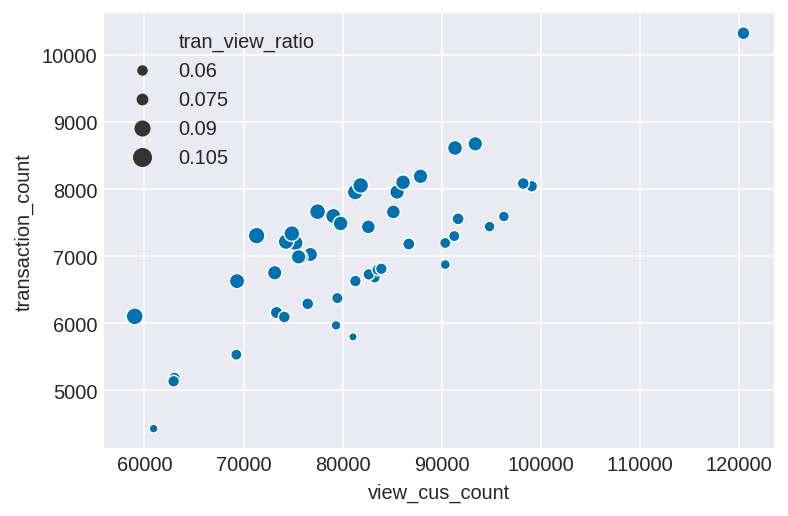

In [8]:
sns.scatterplot(x='view_cus_count',
                y='transaction_count',
                size='tran_view_ratio',
                data=uniformed_df)

In [ ]:
# Question, why is there a sort of valley that seperate the data points into two groups


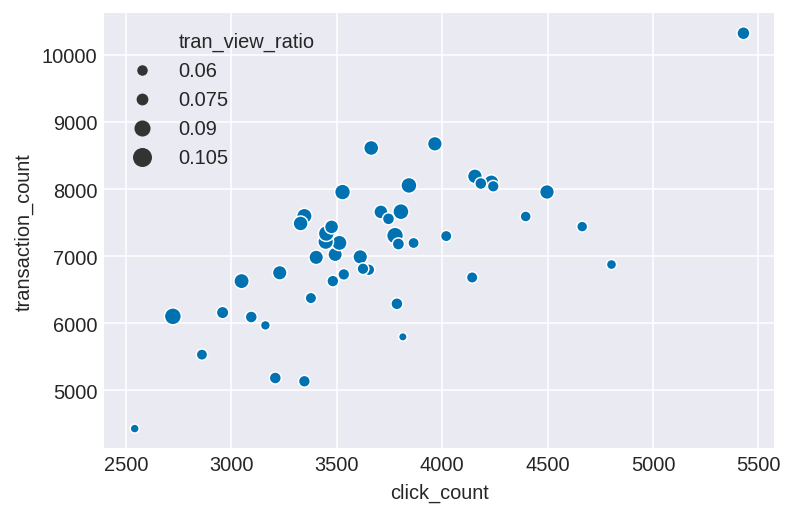

In [9]:
sns.scatterplot(x='click_count',
                y='transaction_count',
                size='tran_view_ratio',
                data=uniformed_df)

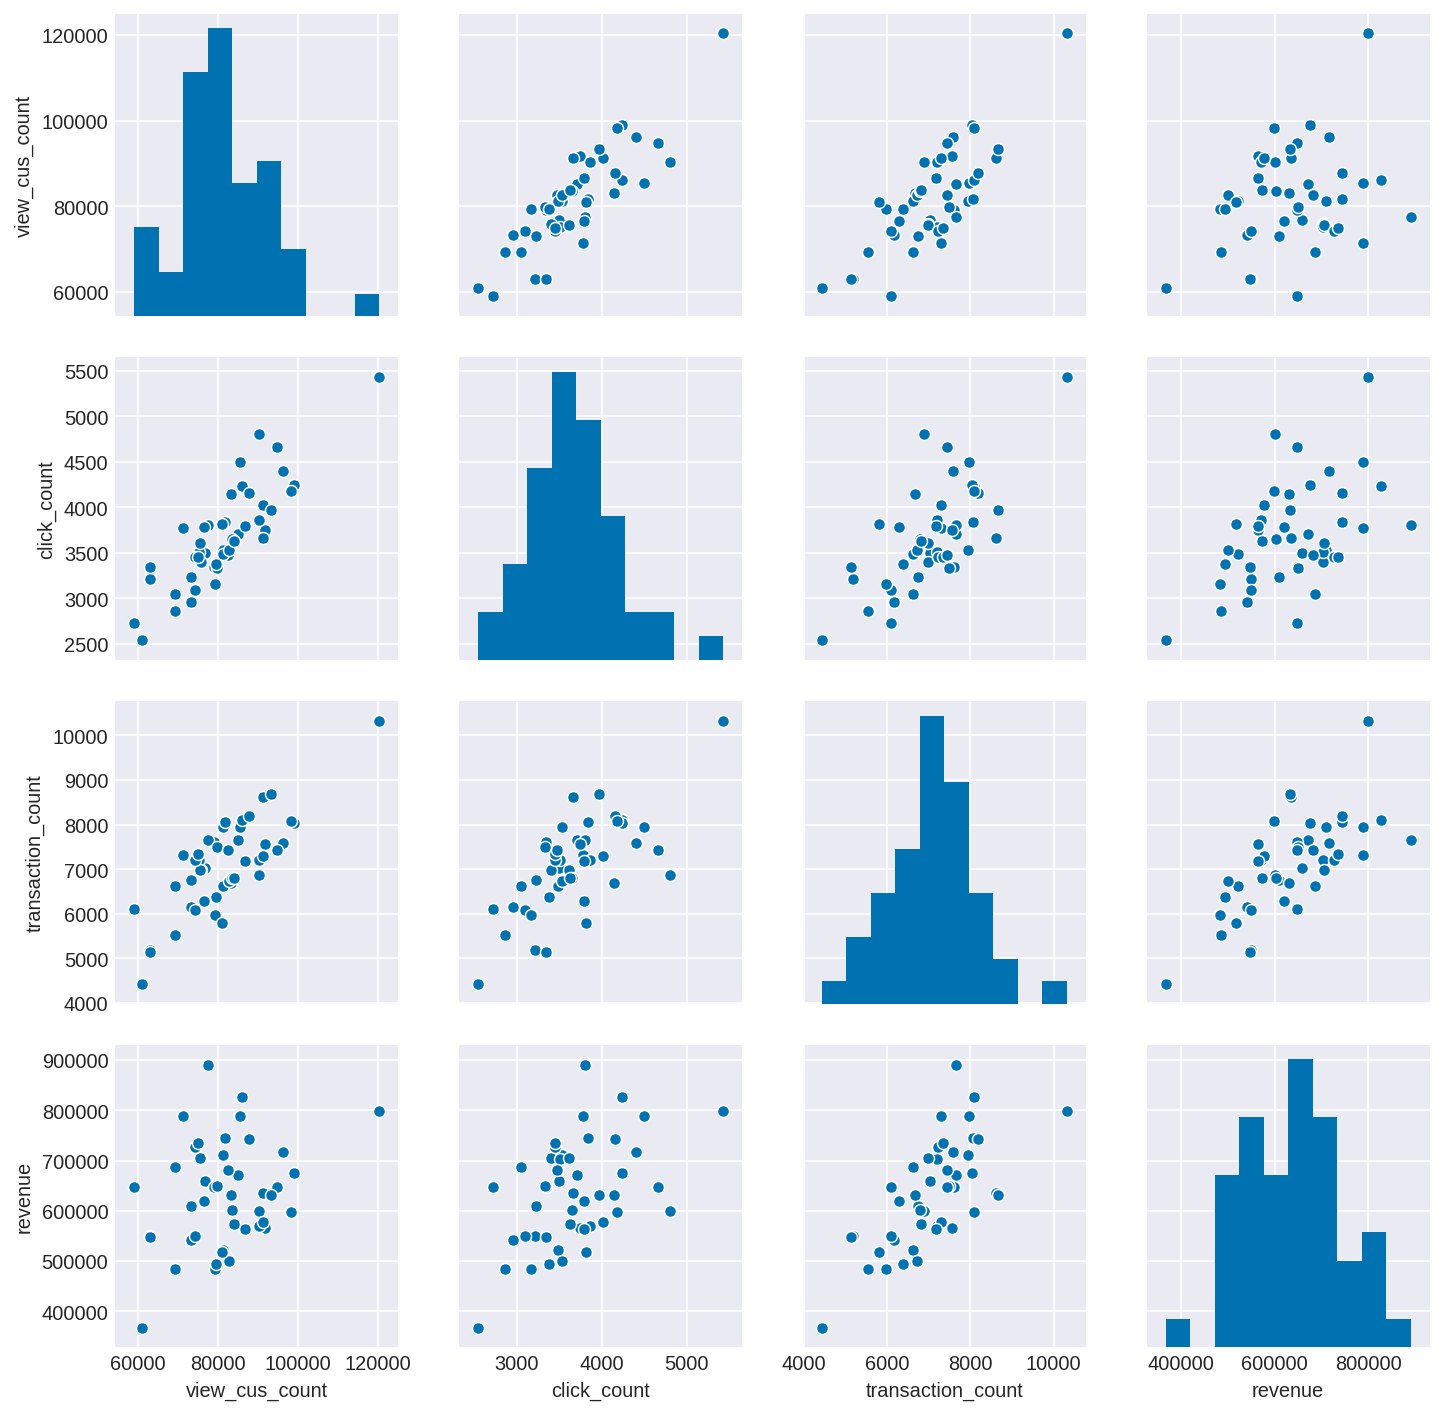

In [11]:
sns.pairplot(data=uniformed_df[['view_cus_count','click_count','transaction_count','revenue']])

#### suspect there is a strong supirous relationship

In [12]:
def normalize_all(df):
    mean_std_dict=dict()
    cols = df.columns
    def normalize(col_name):
        mean = df[col_name].mean()
        std = df[col_name].std()
        df[col_name] = (df[col_name] - mean)/std
        mean_std_dict[col_name] = (mean, std)
    for col in cols:
        if col != 'date':
            normalize(col)
    return mean_std_dict

mean_std_dict = normalize_all(uniformed_df)

/home/fm-rui/anaconda3/envs/fastai-cpu/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [13]:
mean_std_dict

{'view_cus_count': (81486.78723404255, 11143.785905228644),
 'view_count': (343513.0, 48370.15969627843),
 'total_cus_count': (6858.0, 997.126022300003),
 'transaction_count': (7088.489361702128, 1029.3938459606984),
 'revenue': (635912.5268085084, 103305.79181927674),
 'click_cus_count': (2700.7872340425533, 390.8082447714142),
 'click_count': (3679.68085106383, 547.3063328855708),
 'tran_view_ratio': (0.08722232196143713, 0.008275816968045255)}

In [14]:
uniformed_df.head()

,date,view_cus_count,view_count,total_cus_count,transaction_count,revenue,click_cus_count,click_count,tran_view_ratio
0,2018-09-01,-1.655881,-0.768180,-1.801177,-1.849136,-0.828200,-0.902712,-0.861822,-0.599956
1,2018-09-02,-1.663868,-0.771922,-1.843298,-1.896737,-0.853545,-0.879683,-0.609678,-0.679967
2,2018-09-03,-0.912597,0.157039,0.250721,0.212271,1.480931,-0.117160,0.175988,1.840993
3,2018-09-04,-2.015813,-1.868053,-0.902594,-0.956378,0.109500,-1.823880,-1.749808,1.956905
4,2018-09-05,-1.845045,-2.085749,-2.537292,-2.581606,-2.594933,-2.072083,-2.080518,-1.751459


In [24]:
with pm.Model() as model_1:
    a = pm.Normal('a', mu=0, sd=10)
    bA = pm.Normal('bA', mu=0, sd=10, shape=2)
    sigma = pm.Uniform('sigma', lower=0, upper=10)
    mu = pm.Deterministic('mu', a+bA[0] * uniformed_df['click_count'] + bA[1]*uniformed_df['view_count'])
    tran_count = pm.Normal('tran_count', mu=mu, sd=sigma, observed=uniformed_df.transaction_count)
    trace_model1 = pm.sample(1000, tune=1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sigma, bA, a]
Sampling 2 chains: 100%|██████████| 4000/4000 [00:05<00:00, 785.42draws/s]
/home/fm-rui/anaconda3/envs/fastai-cpu/lib/python3.6/site-packages/mkl_fft/_numpy_fft.py:1044: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  output = mkl_fft.rfftn_numpy(a, s, axes)


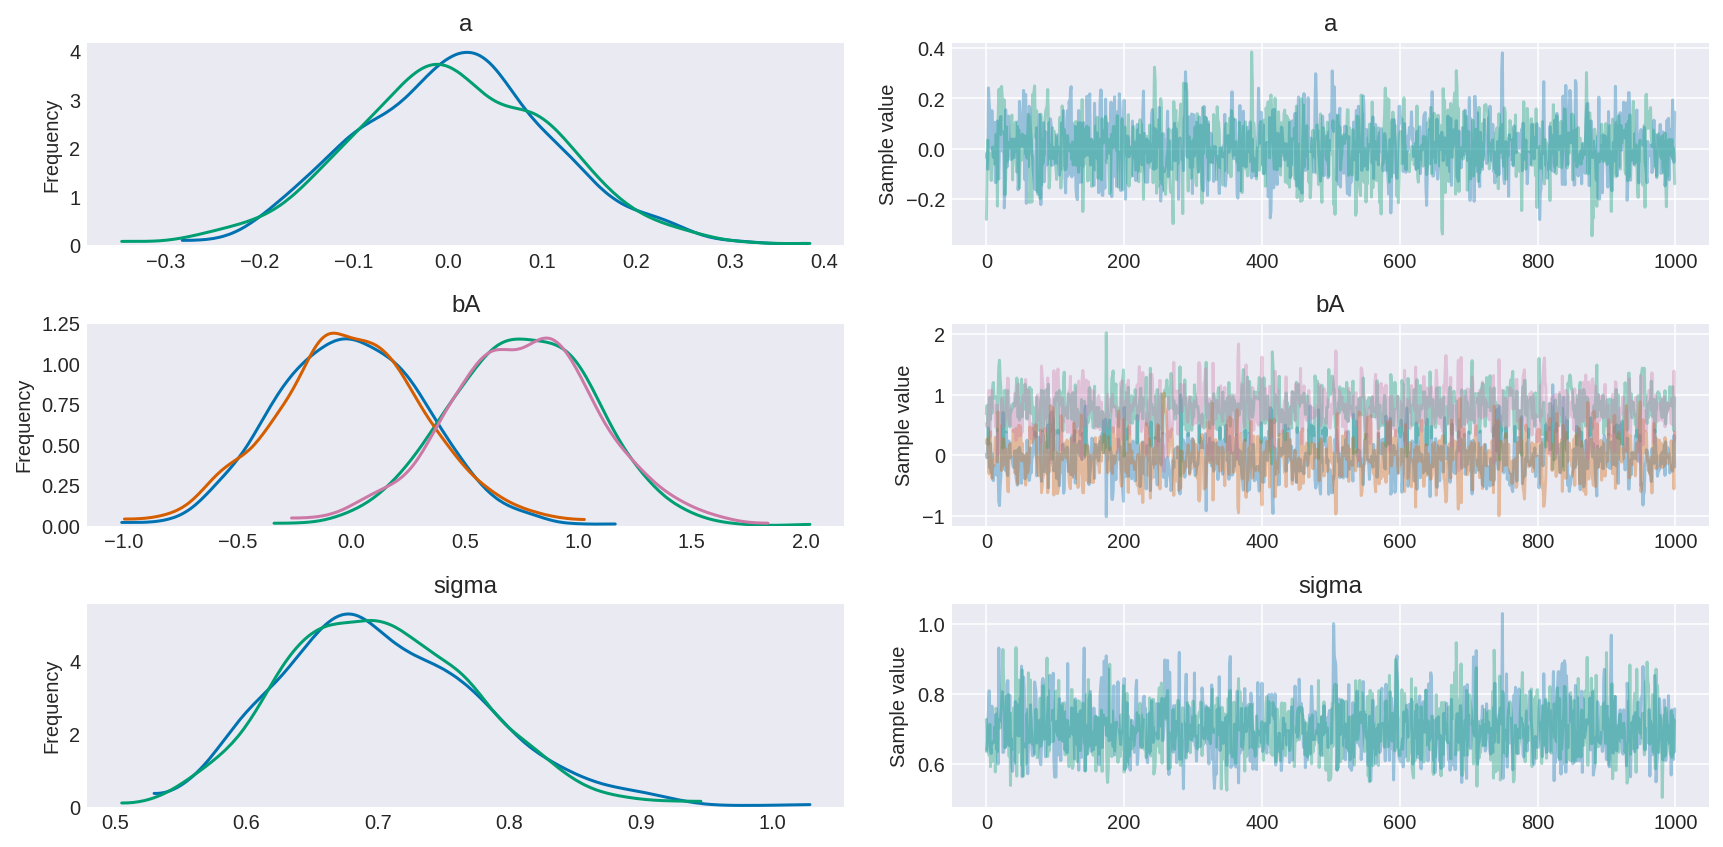

In [25]:
varnames = ['a', 'bA', 'sigma']
pm.traceplot(trace_model1, varnames);

In [26]:
pm.summary(trace_model1, varnames, alpha=.5).round(3)

/home/fm-rui/anaconda3/envs/fastai-cpu/lib/python3.6/site-packages/mkl_fft/_numpy_fft.py:1044: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  output = mkl_fft.rfftn_numpy(a, s, axes)


,mean,sd,mc_error,hpd_25,hpd_75,n_eff,Rhat
a,0.005,0.105,0.003,-0.058,0.084,1408.942,1.0
bA__0,-0.009,0.328,0.009,-0.208,0.223,1059.739,1.0
bA__1,0.749,0.327,0.009,0.575,1.004,1100.332,1.0
sigma,0.702,0.075,0.002,0.632,0.733,1404.840,1.0


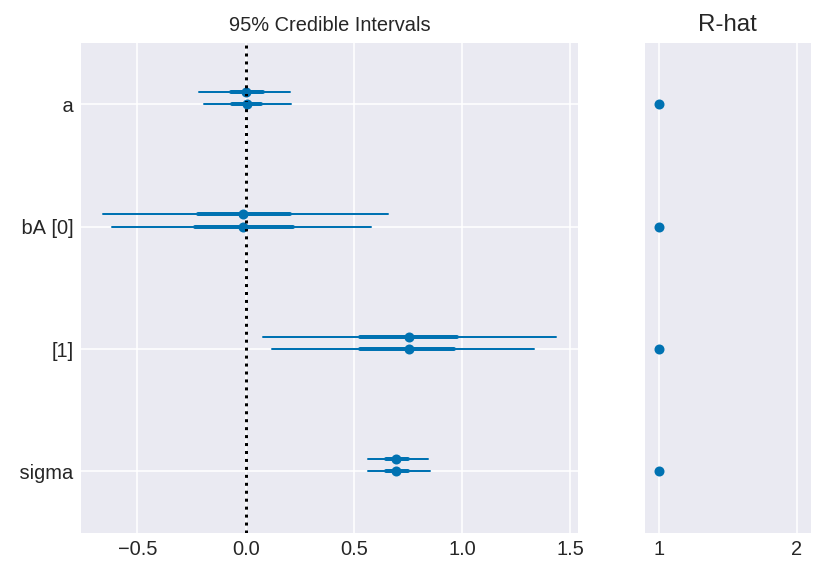

In [27]:
pm.forestplot(trace_model1, varnames=varnames)

In [28]:
with pm.Model() as model2:
    a = pm.Normal('a', mu=0, sd=5)
    b = pm.Normal('b', mu=0, sd=1)
    sigma = pm.Uniform('sigma', lower=0, upper=1)
    mu = pm.Deterministic('mu', a + b*uniformed_df.view_count)
    click = pm.Normal('click', mu=mu, sd=sigma, observed = uniformed_df.click_count)
    trace_model2 = pm.sample(1000, tune=1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sigma, b, a]
Sampling 2 chains: 100%|██████████| 4000/4000 [00:02<00:00, 1551.49draws/s]
/home/fm-rui/anaconda3/envs/fastai-cpu/lib/python3.6/site-packages/mkl_fft/_numpy_fft.py:1044: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  output = mkl_fft.rfftn_numpy(a, s, axes)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff1480e0198>,
      dtype=object)

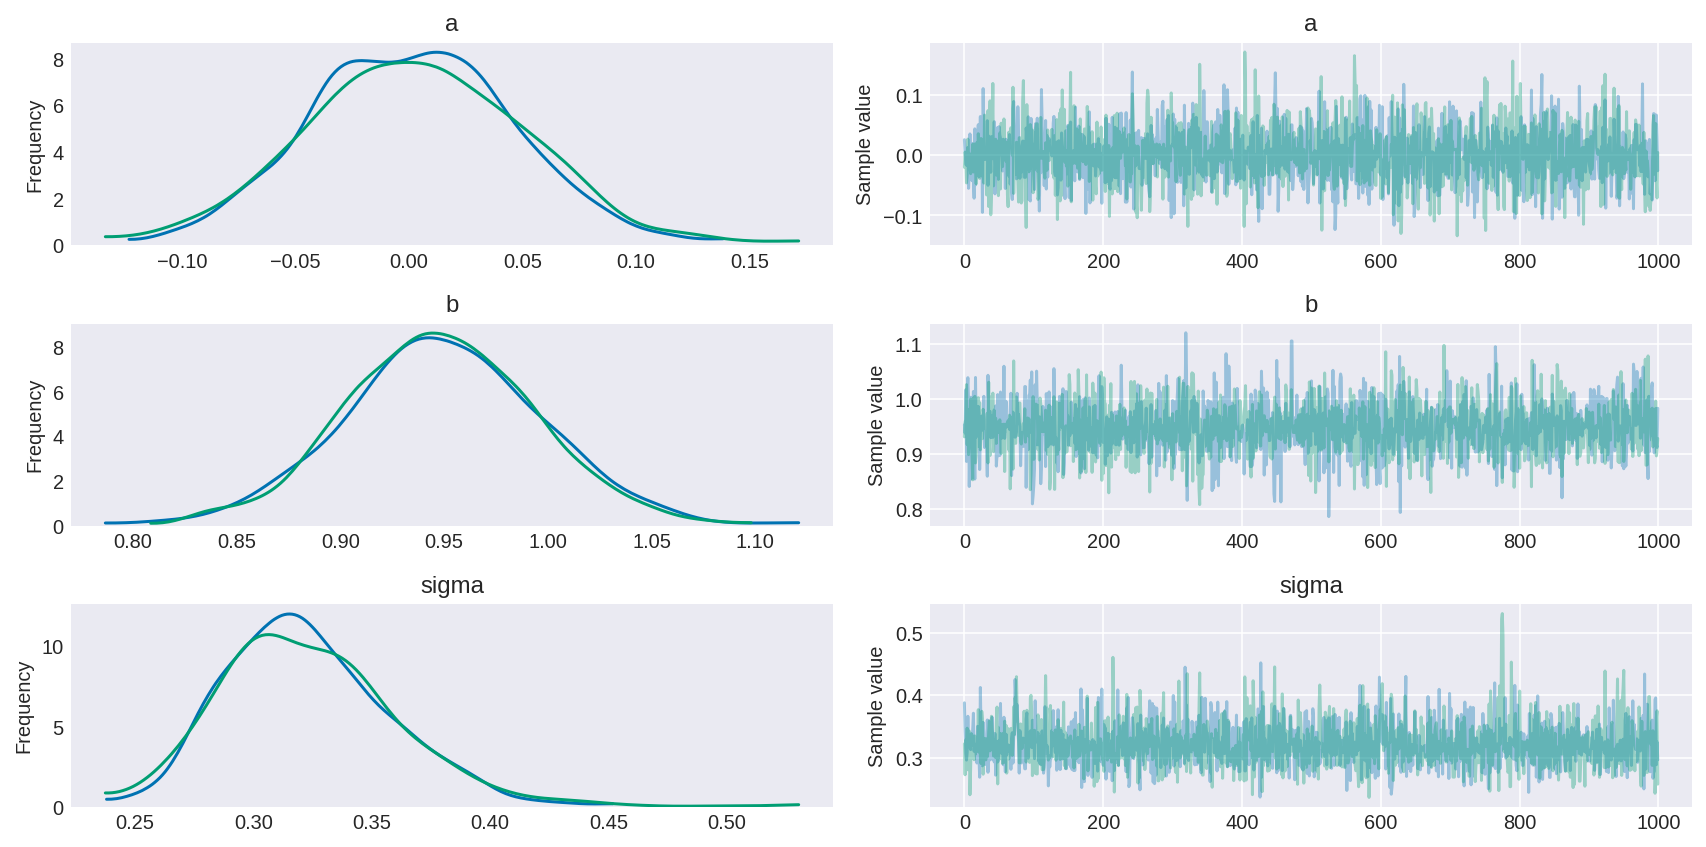

In [29]:
varnames = ['a', 'b', 'sigma']
pm.traceplot(trace_model2, varnames)

In [30]:
mu_pred = trace_model2['mu'].mean(0)
uniformed_df['click_residual'] = uniformed_df['click_count'] - mu_pred

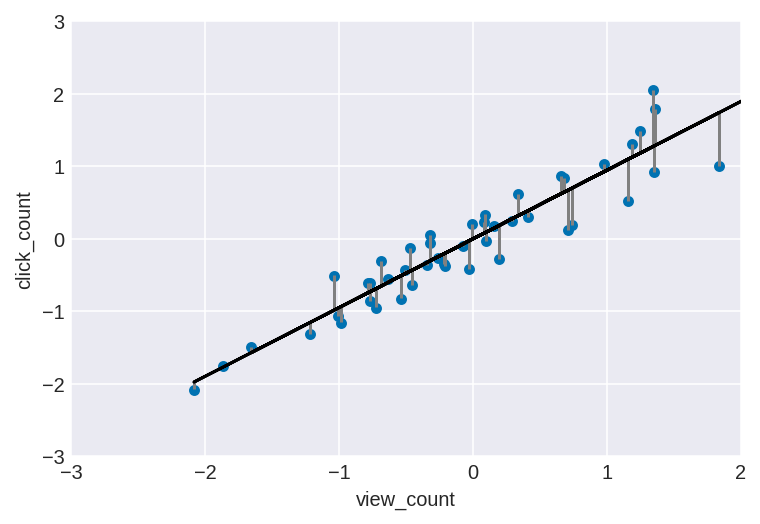

In [34]:
# residual plot
uniformed_df.plot('view_count', 'click_count', kind='scatter', xlim=(-3,2), ylim=(-3,3))
plt.plot(uniformed_df.view_count, mu_pred,'k')
plt.vlines(uniformed_df.view_count, mu_pred, mu_pred+uniformed_df['click_residual'],colors='grey')

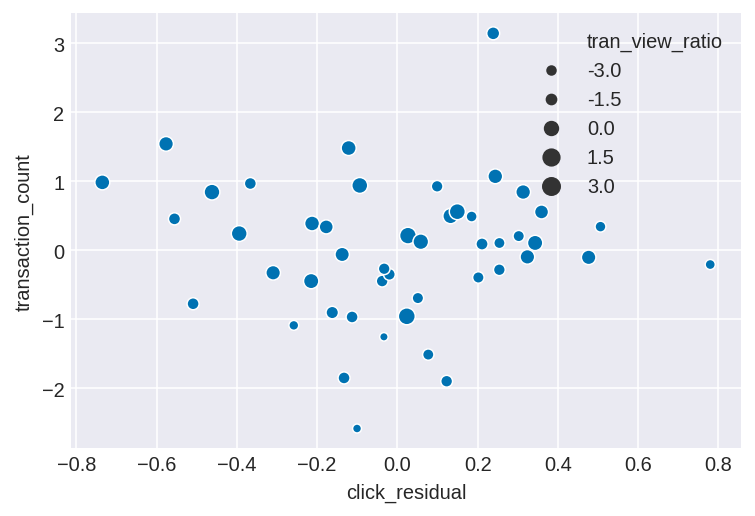

In [35]:
# residual versus transaction count plot
sns.scatterplot(x='click_residual',
                y='transaction_count',
                size='tran_view_ratio',
                data=uniformed_df)

In [36]:
# click count predict view count, predict transaction count
with pm.Model() as model3:
    a = pm.Normal('a', mu=0, sd=5)
    b = pm.Normal('b', mu=0, sd=1)
    sigma = pm.Uniform('sigma', lower=0, upper=1)
    mu = pm.Deterministic('mu', a + b*uniformed_df.click_count)
    view = pm.Normal('view', mu=mu, sd=sigma, observed = uniformed_df.view_count)
    trace_model3 = pm.sample(1000, tune=1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sigma, b, a]
Sampling 2 chains: 100%|██████████| 4000/4000 [00:02<00:00, 1698.28draws/s]
/home/fm-rui/anaconda3/envs/fastai-cpu/lib/python3.6/site-packages/mkl_fft/_numpy_fft.py:1044: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  output = mkl_fft.rfftn_numpy(a, s, axes)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff142a8a390>,
      dtype=object)

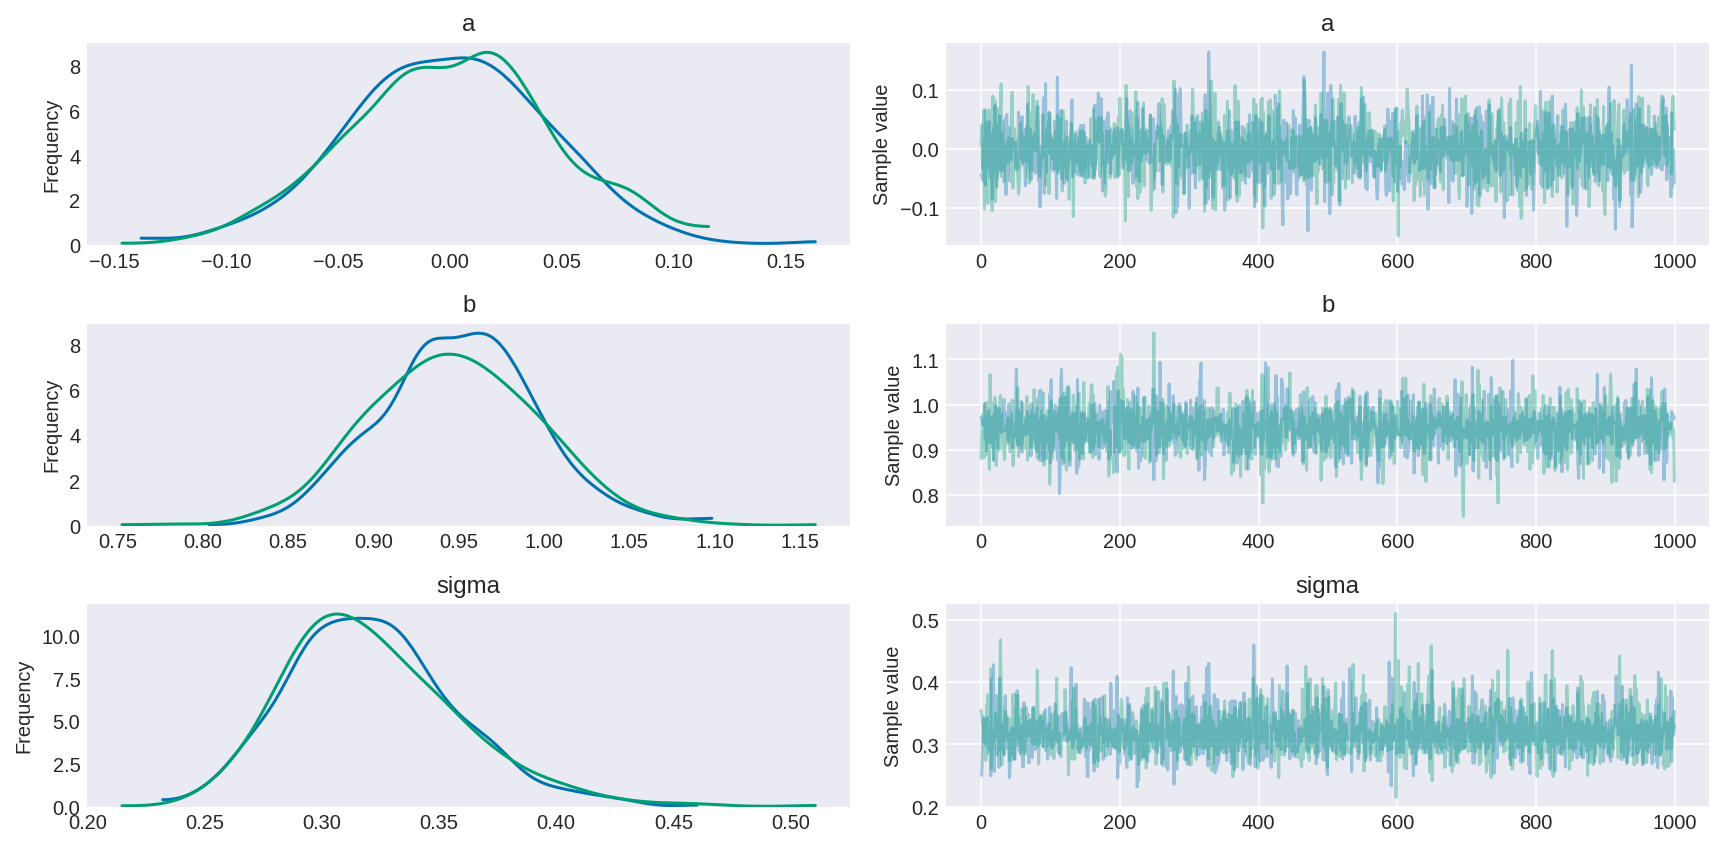

In [37]:
pm.traceplot(trace_model3, varnames)

/home/fm-rui/anaconda3/envs/fastai-cpu/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


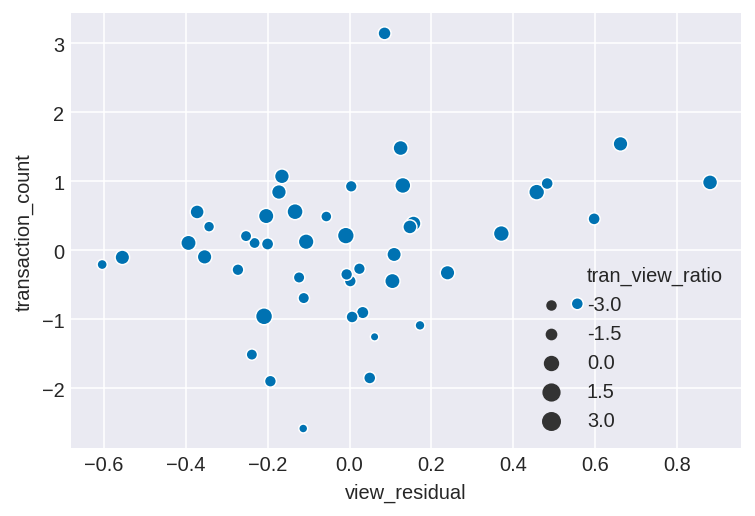

In [42]:
mu_pred_view = trace_model3['mu'].mean(0)
uniformed_df['view_residual'] = uniformed_df['view_count'] - mu_pred_view

sns.scatterplot(x='view_residual',
                y='transaction_count',
                size='tran_view_ratio',
                data=uniformed_df)

In [43]:
uniformed_df.head(10)

,date,view_cus_count,view_count,total_cus_count,transaction_count,revenue,click_cus_count,click_count,tran_view_ratio,click_residual,view_residual
0,2018-09-01,-1.655881,-0.768180,-1.801177,-1.849136,-0.828200,-0.902712,-0.861822,-0.599956,-0.132872,0.049164
1,2018-09-02,-1.663868,-0.771922,-1.843298,-1.896737,-0.853545,-0.879683,-0.609678,-0.679967,0.122825,-0.193552
2,2018-09-03,-0.912597,0.157039,0.250721,0.212271,1.480931,-0.117160,0.175988,1.840993,0.026416,-0.009220
3,2018-09-04,-2.015813,-1.868053,-0.902594,-0.956378,0.109500,-1.823880,-1.749808,1.956905,0.023503,-0.209103
4,2018-09-05,-1.845045,-2.085749,-2.537292,-2.581606,-2.594933,-2.072083,-2.080518,-1.751459,-0.100499,-0.113362
5,2018-09-06,-0.748829,-0.541698,-0.300865,-0.325910,-0.253628,-0.769654,-0.823453,0.616849,-0.309554,0.239281
6,2018-09-07,-0.425779,-0.216787,-0.053153,-0.060705,0.221682,-0.332100,-0.342917,0.523356,-0.137531,0.108756
7,2018-09-08,0.155173,0.676595,-0.340980,-0.393911,-0.038978,0.924271,0.844717,-0.835355,0.201813,-0.123465
8,2018-09-09,0.358246,1.242109,0.946721,0.843711,1.477206,1.331120,1.493349,0.708676,0.313472,-0.172704
10,2018-09-11,0.324864,-0.322410,0.608750,0.555191,0.342839,0.102896,0.053570,0.336163,0.359248,-0.372645


In [44]:
import pixiedust

Pixiedust database opened successfully
Table VERSION_TRACKER created successfully
Table METRICS_TRACKER created successfully

Share anonymous install statistics? (opt-out instructions)

PixieDust will record metadata on its environment the next time the package is installed or updated. The data is anonymized and aggregated to help plan for future releases, and records only the following values:

{
   "data_sent": currentDate,
   "runtime": "python",
   "application_version": currentPixiedustVersion,
   "space_id": nonIdentifyingUniqueId,
   "config": {
       "repository_id": "https://github.com/ibm-watson-data-lab/pixiedust",
       "target_runtimes": ["Data Science Experience"],
       "event_id": "web",
       "event_organizer": "dev-journeys"
   }
}
You can opt out by calling pixiedust.optOut() in a new cell.


Pixiedust runtime updated. Please restart kernel
Table USER_PREFERENCES created successfully
Table service_connections created successfully


In [50]:
uniformed_df['day'] = uniformed_df.date.dt.day

/home/fm-rui/anaconda3/envs/fastai-cpu/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [53]:
uniformed_df['wom'] = uniformed_df['day'].apply(lambda d: min((d-1) // 7 + 1,4))
display(uniformed_df)    

In [69]:
import warnings
warnings.filterwarnings("ignore")

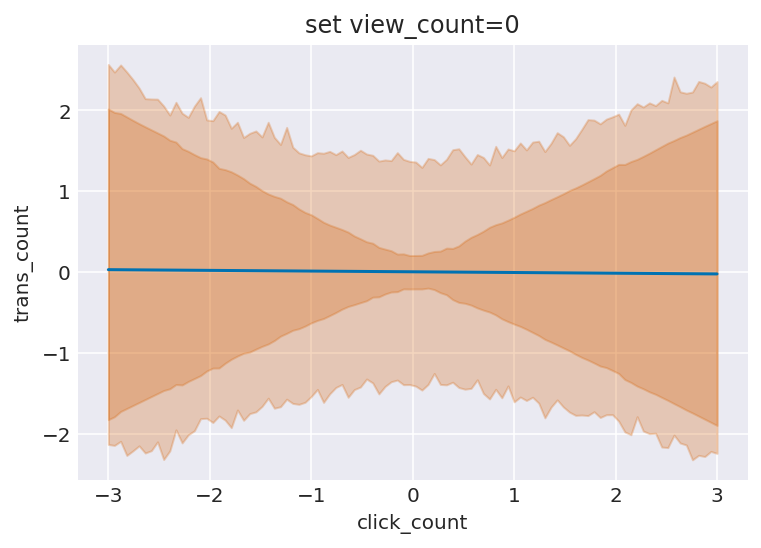

In [70]:
# ficitionally, we set view_count = 0, and predict if click count predictive power changes
R_avg = np.linspace(-3, 3, 100)

mu_pred = trace_model1['a'] + trace_model1['bA'][:, 0] * R_avg[:, None]
mu_hpd = pm.hpd(mu_pred.T)
tran_count_hpd = pm.hpd(stats.norm.rvs(mu_pred, trace_model1['sigma']).T)

plt.plot(R_avg, mu_pred.mean(1), 'C0')
plt.fill_between(R_avg, mu_hpd[:, 0], mu_hpd[:, 1], color='C2', alpha=0.25)
plt.fill_between(R_avg, tran_count_hpd[:, 0], tran_count_hpd[:, 1], color='C2', alpha=0.25)

plt.xlabel('click_count')
plt.ylabel('trans_count')
plt.title('set view_count=0');

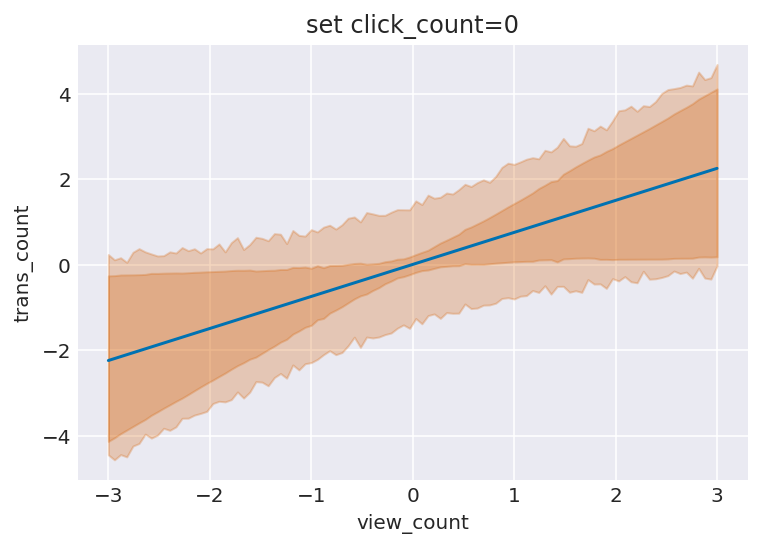

In [72]:
# ficitionally, we set click_count = 0, and predict if view count predictive power changes
R_avg = np.linspace(-3, 3, 100)

mu_pred = trace_model1['a'] + trace_model1['bA'][:, 1] * R_avg[:, None]
mu_hpd = pm.hpd(mu_pred.T)
tran_count_hpd = pm.hpd(stats.norm.rvs(mu_pred, trace_model1['sigma']).T)

plt.plot(R_avg, mu_pred.mean(1), 'C0')
plt.fill_between(R_avg, mu_hpd[:, 0], mu_hpd[:, 1], color='C2', alpha=0.25)
plt.fill_between(R_avg, tran_count_hpd[:, 0], tran_count_hpd[:, 1], color='C2', alpha=0.25)

plt.xlabel('view_count')
plt.ylabel('trans_count')
plt.title('set click_count=0');

In [73]:
mu_pred = trace_model1['mu']
mu_hpd = pm.hpd(mu_pred)

tran_count_pred = pm.sample_ppc(trace_model1, samples=1000, model=model_1)['tran_count']
tran_count_hpd = pm.hpd(tran_count_pred)

100%|██████████| 1000/1000 [00:01<00:00, 560.30it/s]


In [76]:
uniformed_df.columns

Index(['date', 'view_cus_count', 'view_count', 'total_cus_count',
       'transaction_count', 'revenue', 'click_cus_count', 'click_count',
       'tran_view_ratio', 'click_residual', 'view_residual', 'day_of_month',
       'day', 'wom'],
      dtype='object')

In [91]:
residuals.sort_values().index

Int64Index([49, 28,  1,  0, 36,  4,  7, 50, 31, 42, 29, 17, 19, 52, 48, 33, 34,
            32,  8, 38, 46, 53, 18, 45,  5,  2, 47,  6, 41, 24, 27, 26,  3, 30,
            15, 25, 37, 23, 22, 16, 54, 21, 20, 10, 43, 11, 44],
           dtype='int64')

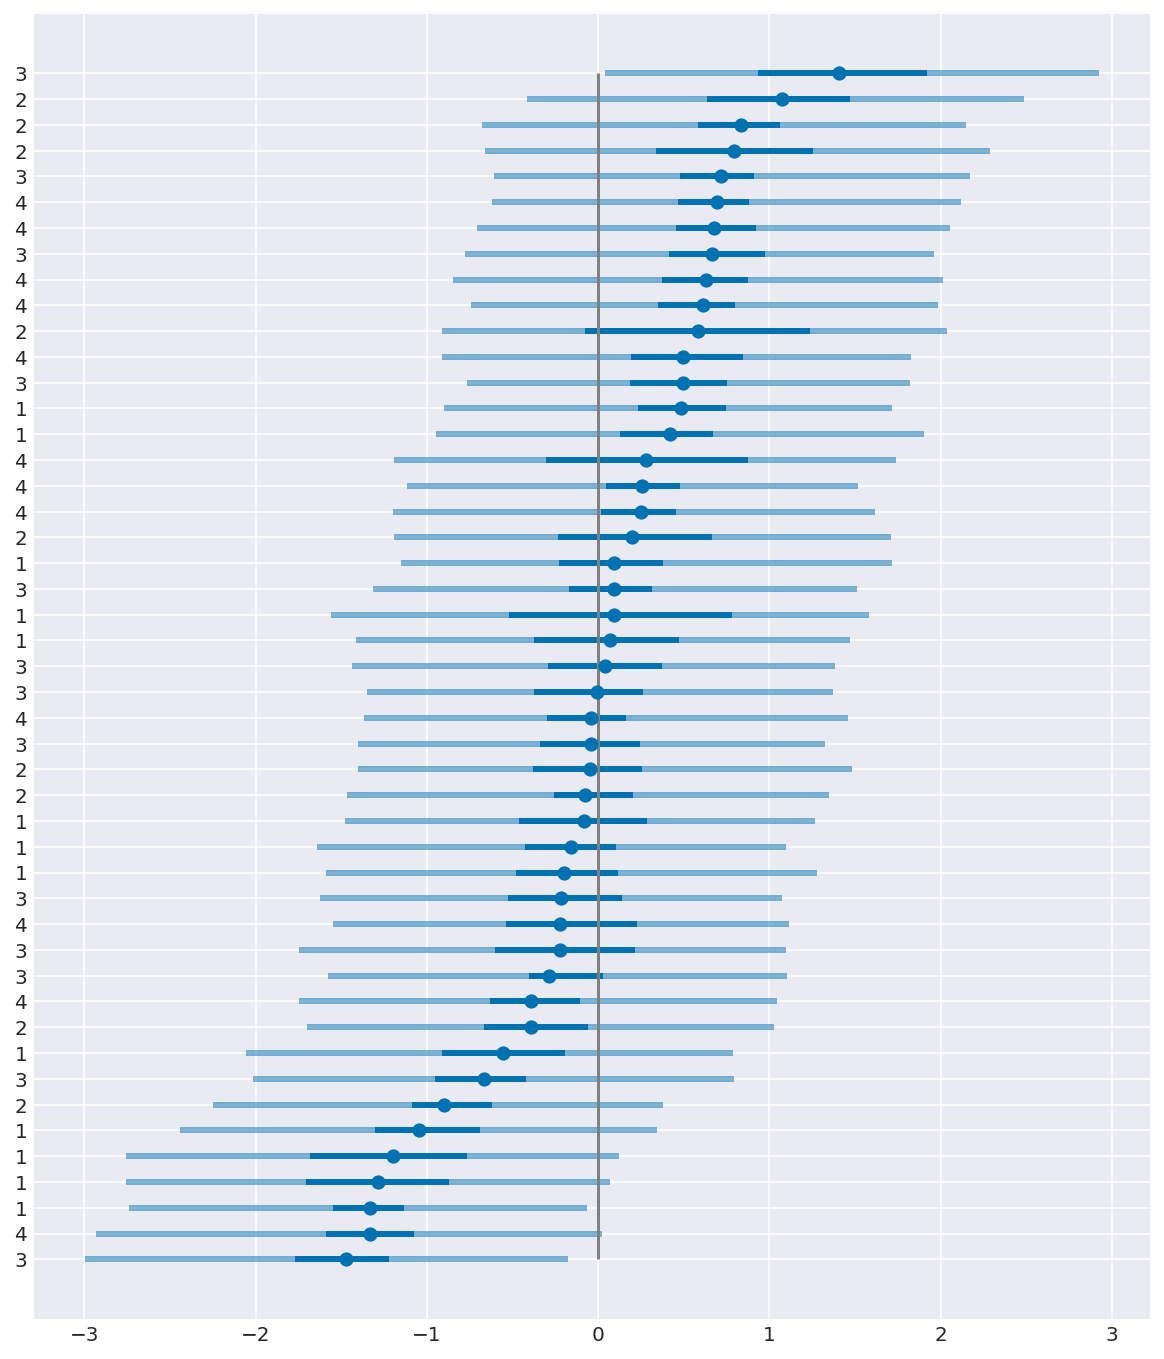

In [96]:
plt.figure(figsize=(10,12))
residuals = uniformed_df['transaction_count'] - mu_pred.mean(0)
idx = residuals.sort_values().index
y_label = uniformed_df['wom'].loc[idx]
y_points = np.linspace(0, 1, 47)
plt.errorbar(residuals[idx], y_points, 
             xerr=np.abs(tran_count_pred.mean(0)-mu_hpd.T),
             fmt='C0o',lw=3)

plt.errorbar(residuals[idx], y_points, 
             xerr=np.abs(tran_count_pred.mean(0)-tran_count_hpd.T),
             fmt='C0o', lw=3, alpha=0.5)

plt.yticks(y_points, y_label);
plt.vlines(0, 0, 1, 'grey');

In [97]:
display(uniformed_df)